## Visualizations for Song Dataset

First, we'll load the dataset and set up the necessary libraries.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


song_dataset = pd.read_csv('song_dataset_final.csv')
song_dataset['Release'] = pd.to_datetime(song_dataset['Release'], errors='coerce')
    
# Remove the row with index 293
# song_dataset.drop(index=293, inplace=True)

# Check for any remaining NaN values in the dataset
remaining_nan_values = song_dataset.isnull().sum()
remaining_nan_values[remaining_nan_values > 0]

Series([], dtype: int64)

In [31]:
song_dataset

,#,Lyrics,Release,Title,Artist,Type,Conditional Lyric Entropy,BPM,Energy,Dance,...,Energy Deviation (Stoiostatic),Valence Deviation (Stoiostatic),Original_Length,Gzip_Length,Bzip2_Length,Most_Compressed_Length,Compression_Ratio,Most_Compressed_Type,Lyric Valence,Lyric Arousal
0,251.0,"Hey\nThat's right\n\nAsked sweet mama, let me ...",1961-01-01,Travelling Riverside Blues,Led Zeppelin,Dionysitic,1.636977,92.0,84.0,47.0,...,33.493827,8.685185,1625.0,718.0,759.0,718.0,0.441846,1.0,0.405458,0.100196
1,1287.0,…,1966-01-01,The Ecstasy Of Gold,Ennio Morricone,Dionysitic,0.000000,186.0,30.0,7.0,...,-20.506173,-46.314815,3.0,23.0,42.0,23.0,7.666667,1.0,0.602140,0.239926
2,1272.0,"Whoa, there's no one\nTo have fun with\nSince ...",1959-12-03,Sittin' And Cryin' The Blues,Willie Dixon,Doloristic,1.239811,134.0,3.0,47.0,...,-47.506173,-45.314815,585.0,249.0,286.0,249.0,0.425641,1.0,0.121450,0.110766
3,23.0,Love come down\nAll the way down\n\nNo sleep l...,1982-07-01,Love Come Down,"Evelyn ""Champagne"" King",Stoiostatic,1.222807,117.0,40.0,88.0,...,-10.506173,29.685185,1593.0,411.0,475.0,411.0,0.258004,1.0,0.180619,0.116525
4,275.0,"Girl, you should be mine\nGirl, you should be ...",1991-01-01,You Should Be Mine,Roger,Dionysitic,1.134996,104.0,89.0,75.0,...,38.493827,40.685185,2351.0,444.0,507.0,444.0,0.188856,1.0,0.477087,0.119349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,67.0,17 18 19 kodo \nWhat ya talkin’ about kodo\n17...,2022-03-25,17 18 19,Ibibio Sound Machine,Dionysitic,1.196875,123.0,76.0,81.0,...,25.493827,38.685185,1954.0,370.0,475.0,370.0,0.189355,1.0,0.456651,0.098690
1309,31.0,"Once there was a battle there\nIn Zaire, in Za...",1976-01-01,In Zaire,Johnny Wakelin,Dionysitic,1.193955,100.0,85.0,67.0,...,34.493827,6.685185,1142.0,330.0,405.0,330.0,0.288967,1.0,0.595711,0.456958
1310,125.0,"\nDown\nTo the ground, baby\nYou sure know how...",2022-08-19,Down,Hot Chip,Dionysitic,1.427181,122.0,86.0,78.0,...,35.493827,37.685185,1869.0,537.0,616.0,537.0,0.287319,1.0,0.441769,0.231179
1311,120.0,\nI'm whistling with this empty hole\nMy refle...,2022-10-14,Dead Inside Shuffle,Louis Cole,Dionysitic,1.662457,133.0,77.0,85.0,...,26.493827,41.685185,1227.0,462.0,517.0,462.0,0.376528,1.0,0.207211,0.140422


### Time Series of Song Releases

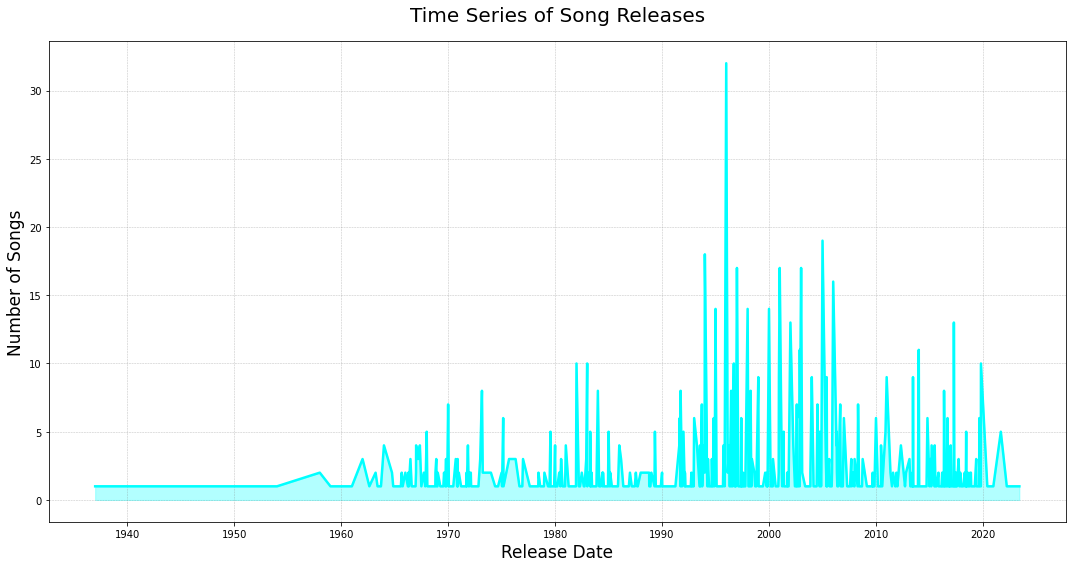

In [45]:

# Group by Release date and count the number of songs for each date
date_counts = song_dataset['Release'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

# Plot the time series graph with enhancements
sns.lineplot(x=date_counts.index, y=date_counts.values, color='cyan', lw=2.5)
plt.fill_between(date_counts.index, date_counts.values, color='cyan', alpha=0.3)

# Title and labels
plt.title('Time Series of Song Releases', fontsize=20, pad=20)
plt.xlabel('Release Date', fontsize=17)
plt.ylabel('Number of Songs', fontsize=17)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()
    

### Distribution of Song Releases by Decade

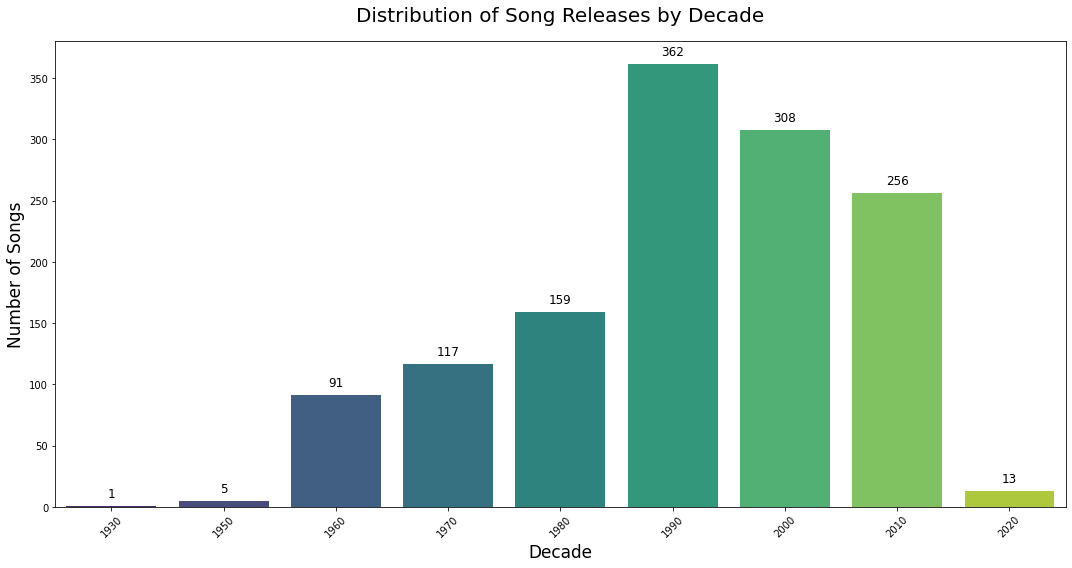

In [46]:

# Extract the decade from the 'Release' column
song_dataset['Decade'] = (song_dataset['Release'].dt.year // 10) * 10

# Group by Decade and count the number of songs for each decade
decade_counts = song_dataset['Decade'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

# Plot the decade distribution with enhancements
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")

# Title, labels, and data labels
plt.title('Distribution of Song Releases by Decade', fontsize=20, pad=20)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('Number of Songs', fontsize=17)
plt.xticks(rotation=45)
for index, value in enumerate(decade_counts.values):
    plt.text(index, value + 10, str(value), ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()
    

### Distribution of Song Releases by Decade and Type

<Figure size 1152x648 with 0 Axes>

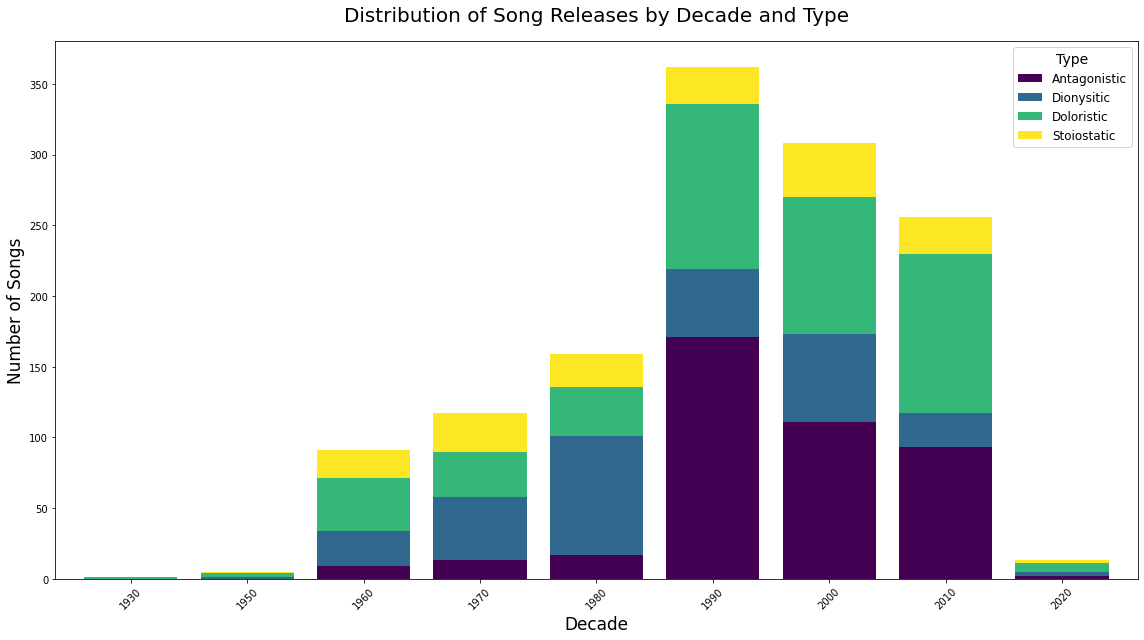

In [47]:

# Group by 'Decade' and 'Type' and count the number of songs for each combination
decade_type_counts = song_dataset.groupby(['Decade', 'Type']).size().unstack().fillna(0)

plt.figure(figsize=(16, 9))

# Plot stacked bar chart
decade_type_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 9), width=0.8)

# Title, labels, and legend
plt.title('Distribution of Song Releases by Decade and Type', fontsize=20, pad=20)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('Number of Songs', fontsize=17)
plt.xticks(rotation=45)
plt.legend(title='Type', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()
    

In [55]:
# Select only the specified columns for training
features = ['Valence', 'Energy', 'Lyric Arousal', 'Lyric Valence']
X = song_dataset[features]
y = song_dataset['Type']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1049, 4), (263, 4))

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy, class_report)


0.6349809885931559               precision    recall  f1-score   support

Antagonistic       0.60      0.66      0.63        73
  Dionysitic       0.68      0.69      0.69        65
  Doloristic       0.67      0.67      0.67        96
 Stoiostatic       0.45      0.34      0.39        29

    accuracy                           0.63       263
   macro avg       0.60      0.59      0.59       263
weighted avg       0.63      0.63      0.63       263



In [53]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, you can train your RandomForestClassifier on the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# The rest of your code (like prediction and evaluation) remains the same

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy, class_report)


0.5513307984790875               precision    recall  f1-score   support

Antagonistic       0.55      0.55      0.55        73
  Dionysitic       0.61      0.65      0.63        65
  Doloristic       0.63      0.52      0.57        96
 Stoiostatic       0.31      0.45      0.37        29

    accuracy                           0.55       263
   macro avg       0.52      0.54      0.53       263
weighted avg       0.57      0.55      0.56       263



In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

best_params


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estim

/Users/michaelrappell/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
864 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
276 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelrappell/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelrappell/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/michaelrappell/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 150}


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, 

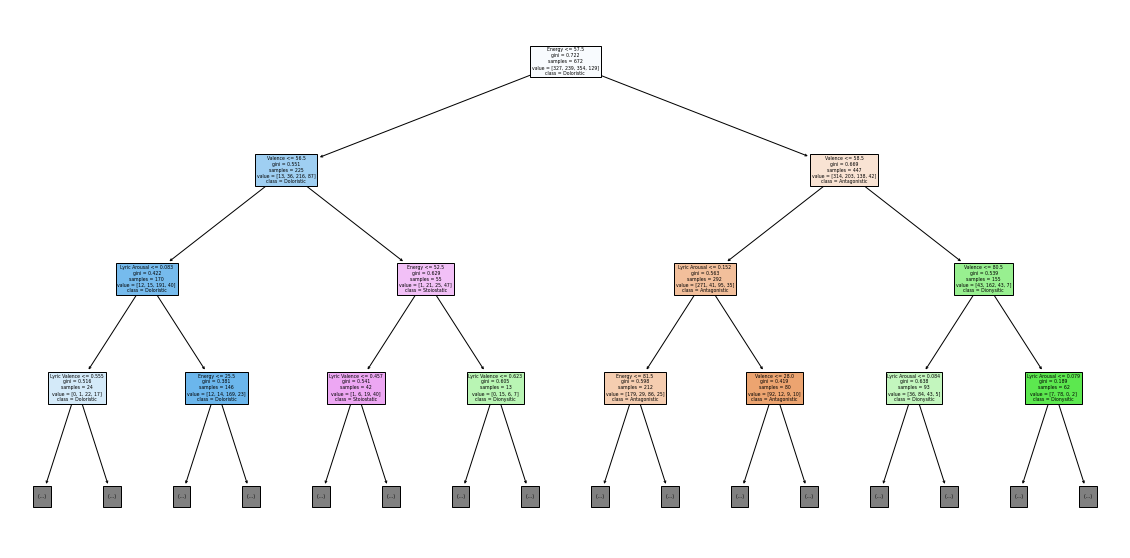

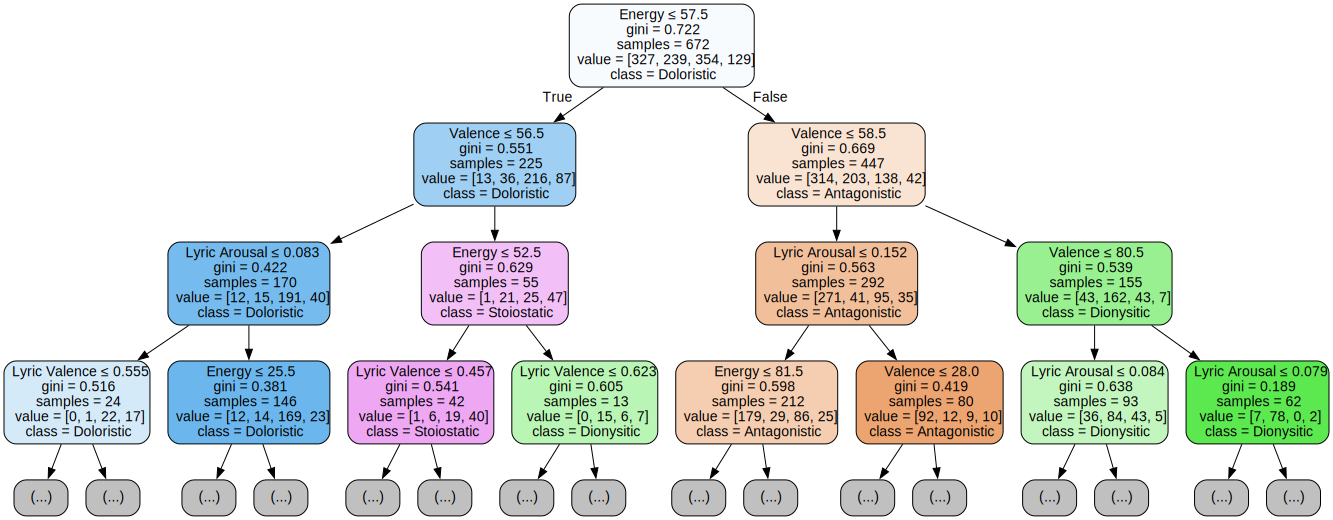

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

le = LabelEncoder()

# Assuming y_train contains the labels
le.fit(y_train)

class_names_list = [str(name) for name in le.classes_]


# Select one tree from the random forest
selected_tree = rf_classifier.estimators_[0] # You can choose any tree index, here we're choosing the first

plt.figure(figsize=(20, 10))
plot_tree(selected_tree, feature_names=features, class_names=class_names_list, max_depth=3, filled=True)
plt.show()

# Export the tree to a dot format
dot_data = export_graphviz(selected_tree, out_file=None, feature_names=features, class_names=class_names_list,
                           filled=True, rounded=True, special_characters=True, max_depth=3)

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)
graph



Here's a visualization of one decision tree from the random forest, focusing on the decision path related to the "Energy" feature. 

In the tree diagram:
- Each box represents a decision node or a terminal node (leaf).
- The first line in each box displays the decision condition (e.g., `Energy <= 57.5`).
- `gini` represents the Gini impurity, which measures the disorder of a set of values. A lower value indicates that the node is purer (i.e., contains samples mostly from one class).
- `samples` is the number of samples at that node.
- `value` shows the number of samples from each class at that node.
- `class` is the dominant class at that node.

From the tree, you can trace how different values of "Energy" influence the decisions made by the tree. Remember that this is just one tree out of many in the random forest, and the final prediction is an aggregation of predictions from all trees.


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Select only the specified columns for training
features = ['Valence', 'Energy', 'Lyric Arousal', 'Lyric Valence']
X = song_dataset[features]
y = song_dataset['Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
clf = SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 63.12%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# song_dataset = pd.read_csv('path_to_your_dataset.csv')

# Select only the specified columns for training
features = ['Valence', 'Energy', 'Lyric Arousal', 'Lyric Valence']
X = song_dataset[features]
y = song_dataset['Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Create an instance of the SVM classifier
clf = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict the labels for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [64]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the dataset
song_dataset = pd.read_csv('song_dataset_final.csv')

# Convert the 'Release' column to a datetime format and extract year, month, and day
song_dataset['Release'] = pd.to_datetime(song_dataset['Release'], errors='coerce')
song_dataset['Release_Year'] = song_dataset['Release'].dt.year
song_dataset['Release_Month'] = song_dataset['Release'].dt.month
song_dataset['Release_Day'] = song_dataset['Release'].dt.day

# Convert the 'Length' feature to total seconds
def convert_length_to_seconds(length_str):
    try:
        minutes, seconds = map(int, length_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None

song_dataset['Length_seconds'] = song_dataset['Length'].apply(convert_length_to_seconds)

# Select features for training
features_extended = ['Valence', 'Energy', 'Lyric Arousal', 'Lyric Valence', 
                     'Release_Year', 'Release_Month', 'Release_Day',
                     'Loud', 'Dance', 'BPM', 'Conditional Lyric Entropy', 'Length_seconds']
X_extended_more = song_dataset[features_extended]
y = song_dataset['Type']

# Split the data
X_train_extended_more, X_test_extended_more, y_train, y_test = train_test_split(X_extended_more, y, test_size=0.2, random_state=42)

# Manual SMOTE implementation
def smote_manual(samples, n_samples, k_neighbors=5):
    nbrs = NearestNeighbors(n_neighbors=k_neighbors + 1).fit(samples)
    _, indices = nbrs.kneighbors(samples)
    
    synthetic_samples = []
    for i in range(n_samples):
        index = np.random.randint(0, samples.shape[0])
        neighbor = np.random.choice(indices[index][1:])
        diff = samples[neighbor] - samples[index]
        gap = np.random.random()
        synthetic = samples[index] + gap * diff
        synthetic_samples.append(synthetic)
    
    return np.array(synthetic_samples)

# Resample the training data using manual SMOTE
n_samples_max = y_train.value_counts().max()
X_resampled_extended_more = X_train_extended_more.copy().values
y_resampled = y_train.copy().values
for label in y_train.unique():
    n_samples_current = sum(y_train == label)
    n_samples_to_generate = n_samples_max - n_samples_current
    if n_samples_to_generate > 0:
        X_samples_to_generate = smote_manual(X_train_extended_more[y_train == label].values, n_samples_to_generate)
        y_samples_to_generate = np.array([label] * n_samples_to_generate)
        X_resampled_extended_more = np.vstack((X_resampled_extended_more, X_samples_to_generate))
        y_resampled = np.hstack((y_resampled, y_samples_to_generate))
shuffle_idx = np.arange(X_resampled_extended_more.shape[0])
np.random.shuffle(shuffle_idx)
X_resampled_extended_more = X_resampled_extended_more[shuffle_idx]
y_resampled = y_resampled[shuffle_idx]

best_rf_classifier = RandomForestClassifier(bootstrap=True, max_depth=20, max_features='sqrt',
                                           min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)


best_rf_classifier.fit(X_resampled_extended_more, y_resampled)



# Predict and evaluate
y_pred_extended_more = best_rf_classifier.predict(X_test_extended_more)
accuracy_extended_more = accuracy_score(y_test, y_pred_extended_more)
class_report_extended_more = classification_report(y_test, y_pred_extended_more)
print(accuracy_extended_more)
print(class_report_extended_more)


0.6083650190114068
              precision    recall  f1-score   support

Antagonistic       0.62      0.70      0.66        73
  Dionysitic       0.66      0.65      0.65        65
  Doloristic       0.68      0.57      0.62        96
 Stoiostatic       0.33      0.41      0.37        29

    accuracy                           0.61       263
   macro avg       0.57      0.58      0.57       263
weighted avg       0.62      0.61      0.61       263



/Users/michaelrappell/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


SMOTE stands for **Synthetic Minority Over-sampling Technique**.


### The Problem: Class Imbalance

In many real-world datasets, especially in the context of classification tasks, you may encounter a situation where one class has significantly fewer samples than the other(s). This is known as class imbalance. When training a machine learning model on imbalanced data, the model might become biased towards the majority class and perform poorly on the minority class.

### The Solution: SMOTE

SMOTE aims to balance the class distribution by creating synthetic examples for the minority class. Instead of simply duplicating minority samples (which can lead to overfitting), SMOTE generates new samples that are interpolations between existing samples in the feature space.

Here's how SMOTE works:

1. **Selecting a Sample**: For each instance in the minority class, SMOTE selects \( k \) nearest neighbors. \( k \) is a user-defined parameter.
2. **Generating Synthetic Instances**: For each of the \( k \) nearest neighbors:
   - Compute the difference between the feature vector of the minority class instance and its neighboring instance.
   - Multiply this difference by a random number between 0 and 1.
   - Add this to the feature vector of the minority class instance to create a new, synthetic instance.

### Advantages and Disadvantages:

**Advantages**:
1. SMOTE can generate a balanced dataset without losing any information.
2. It can improve the performance of the classifier on the minority class.

**Disadvantages**:
1. Over-sampling might lead to overfitting since it creates synthetic instances based on existing samples.
2. In high dimensional datasets, the notion of "nearest neighbors" might not be meaningful, and SMOTE can introduce noise.
3. SMOTE does not consider the majority class samples. This means that certain areas of the majority class might be prone to misclassification.

### In Summary:

SMOTE is a powerful technique to handle class imbalance. However, like all techniques, it's essential to understand its strengths and weaknesses and to use it judiciously in the right context. It's also recommended to combine SMOTE with other techniques, like under-sampling of the majority class or using algorithms that are inherently equipped to handle class imbalance.

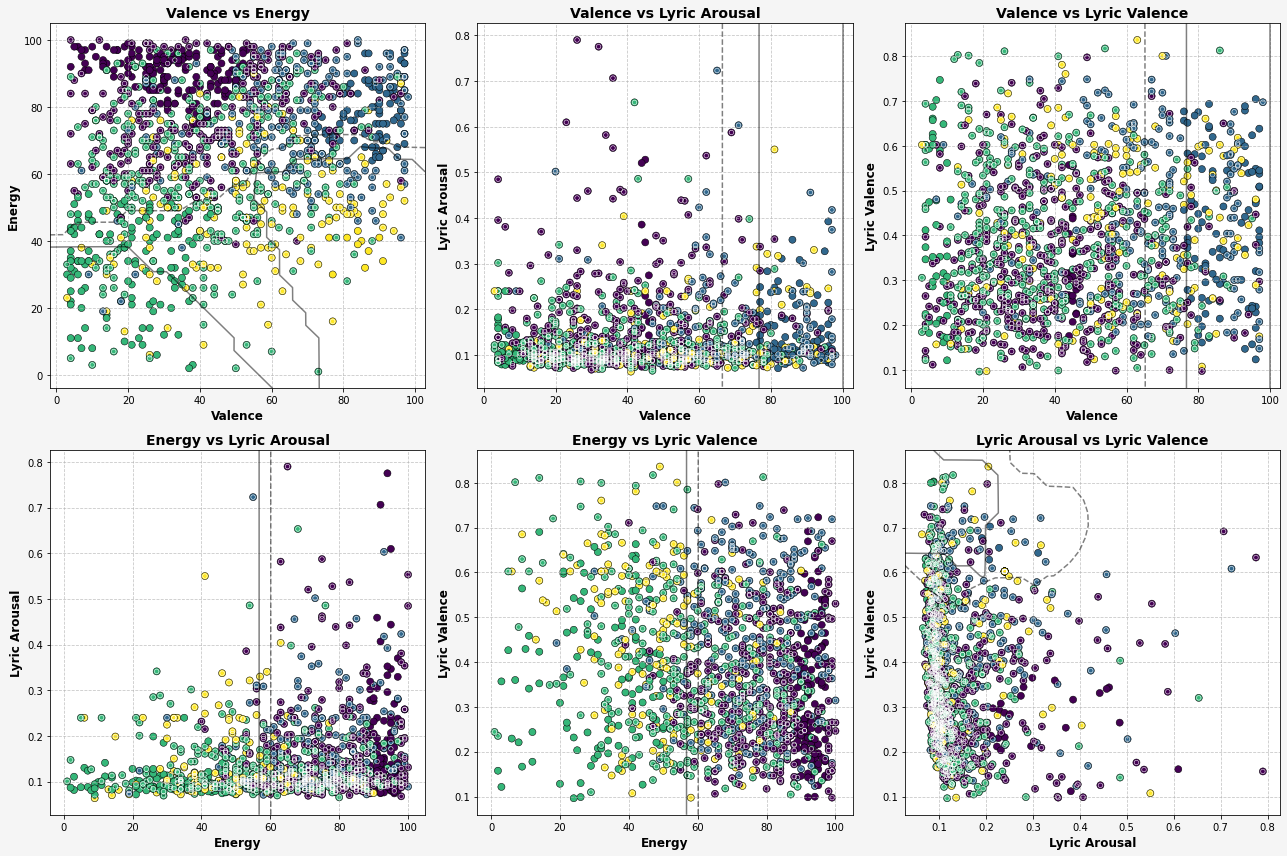

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

def plot_svm_decision_boundary(X, y, clf, ax, feature_names):
    # Encode string labels to numerical values
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y_encoded, s=50, cmap='viridis', edgecolor='k', linewidth=0.5)
    # Create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy)
    
    if Z.ndim == 1:
        Z = Z.reshape(XX.shape)
    else:
        Z = Z[:, 0].reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20, facecolors='none', edgecolors='white', linewidth=0.5)
    ax.set_xlabel(feature_names[0], fontsize=12, fontweight='bold')
    ax.set_ylabel(feature_names[1], fontsize=12, fontweight='bold')
    ax.set_title(f"{feature_names[0]} vs {feature_names[1]}", fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)

# Assuming you've already converted string labels to numeric values
features = ['Valence', 'Energy', 'Lyric Arousal', 'Lyric Valence']

# Create pairwise plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='whitesmoke')
feature_pairs = [(features[i], features[j]) for i in range(len(features)) for j in range(i+1, len(features))]
for ax, (feature1, feature2) in zip(axes.ravel(), feature_pairs):
    X_subset = song_dataset[[feature1, feature2]].values
    y_subset = song_dataset['Type'].values
    clf = SVC(decision_function_shape='ovr').fit(X_subset, y_subset)
    plot_svm_decision_boundary(X_subset, y_subset, clf, ax, [feature1, feature2])
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Load the dataset
song_dataset = pd.read_csv('song_dataset 2.csv')

# Check for NaN values in the dataset
nan_counts = song_dataset.isnull().sum()

nan_counts

# Remove rows with NaN values
cleaned_song_dataset = song_dataset.dropna()

# Check the shape of the original and cleaned datasets to see how many rows were dropped
original_shape = song_dataset.shape
cleaned_shape = cleaned_song_dataset.shape

original_shape, cleaned_shape



((1313, 45), (1312, 45))